In [87]:
# first we import the dataset, combine it, concatenate it and then we do Preprocessing

In [88]:
# importing data
from google.colab import data_table
from google.colab import drive
# Enable the interactive table feature
data_table.enable_dataframe_formatter()
# Access Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# import important libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA



In [90]:
#  folder where the data is, read_csv function, apply delimiter to separate the semicolon
# file_paths = ["/content/drive/MyDrive/820_UnsuperML/bank.csv", "/content/drive/MyDrive/820_UnsuperML/bank-full.csv","/content/drive/MyDrive/820_UnsuperML/bank-additional.csv","/content/drive/MyDrive/820_UnsuperML/bank-additional-full.csv"]
# file 1
file_path1 = '/content/drive/MyDrive/820_UnsuperML/bank-full.csv'
df1 = pd.read_csv(file_path1, delimiter=';')
df1
df1.info()
# file 2
file_path2 = '/content/drive/MyDrive/820_UnsuperML/bank.csv'
df2 = pd.read_csv(file_path1, delimiter=';')
df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 

In [91]:
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df
# make a copy of original data
original_data = combined_df.copy()
print(original_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90422 entries, 0 to 90421
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        90422 non-null  int64 
 1   job        90422 non-null  object
 2   marital    90422 non-null  object
 3   education  90422 non-null  object
 4   default    90422 non-null  object
 5   balance    90422 non-null  int64 
 6   housing    90422 non-null  object
 7   loan       90422 non-null  object
 8   contact    90422 non-null  object
 9   day        90422 non-null  int64 
 10  month      90422 non-null  object
 11  duration   90422 non-null  int64 
 12  campaign   90422 non-null  int64 
 13  pdays      90422 non-null  int64 
 14  previous   90422 non-null  int64 
 15  poutcome   90422 non-null  object
 16  y          90422 non-null  object
dtypes: int64(7), object(10)
memory usage: 11.7+ MB
None


In [92]:
# Remove duplicates
combined_df.drop_duplicates(inplace=True)

In [93]:
# check base information
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [94]:
print(combined_df.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [95]:
# Check the missing value
print(combined_df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [96]:
print(combined_df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


Data Dictionary
Age: Customer Age

Job: Type of job (admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown)

Marital: Marital status (divorced,married,single,unknown; note: divorced means divorced or widowed)

Education: Education Level(Basic_4_year, Basic_6_year, Basic_9_year, High-School, Illiterate, Professional_course, University_Degree, Unknown)

Default: Has credit in default

Balance: Average yearly balance

Housing: Has housing loan?

Loan: Has personal loan?

Contact: Contact Communication Type (Cellular, Telephone)

Day_of_Week: Last contact day of the week.

Month: Last contact month of year.

Duration: Last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

previous: Number of contacts performed before this campaign and for this client.

poutcome: Outcome of the previous marketing campaign (failure,nonexistent,success)

Y: Has the client subscribed a term deposit?

# **Data Exploration**


**We will explore data to look for patterns, skewness, any outstanding element that we can look for visually in Histogram**

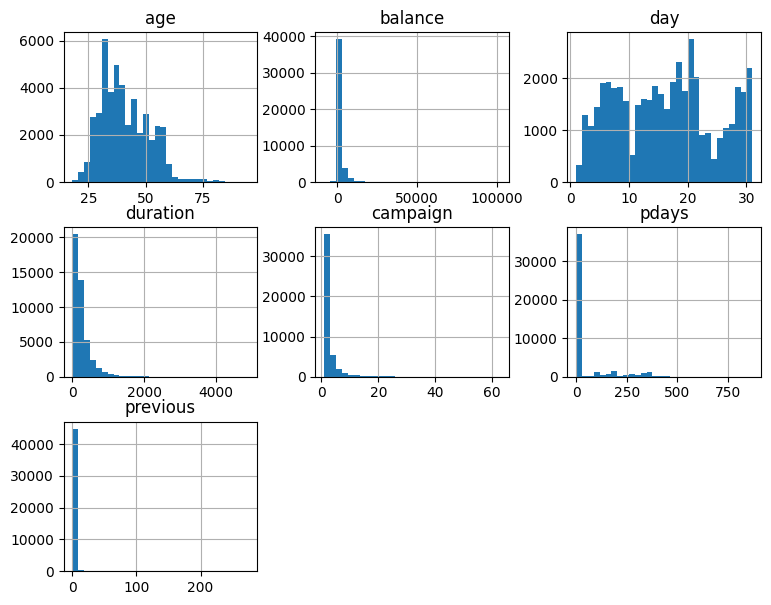

In [97]:


# Plot histograms graph of numerical columns
combined_df.hist(figsize=(9, 7), bins=30)
plt.show()

Our observations are below:

1. Age appears to the rightly skewed, most of the data points gather around 25 and 60, and there are fewer older individuals in the data, since older individuals are less frequent, we can also focus on them in our analysis.

2. Balance: The data looks very spread out, with values ranging from 0 - 100,000, most likely contain outliers hence the wide range, it appears that most of the customers have low balance as the histogram suggest most of the values are concentrated around 0 - 30,000 values. Now this is another variable for interest for us because we detect outliers here.

3. Duration: This is duration of the calls, and it seems that most calls are in range of 0-600 seconds, but it seems that there are some calls that lasted from range 600-2000 seconds.

4. P days: Many customers where not contacted for days more than 50 days have passed.

5. Previous: We can observe that it is rightly skewed, number of contacts contacted are less, but they fall into range of 0- 20. We will look into this variable later on.

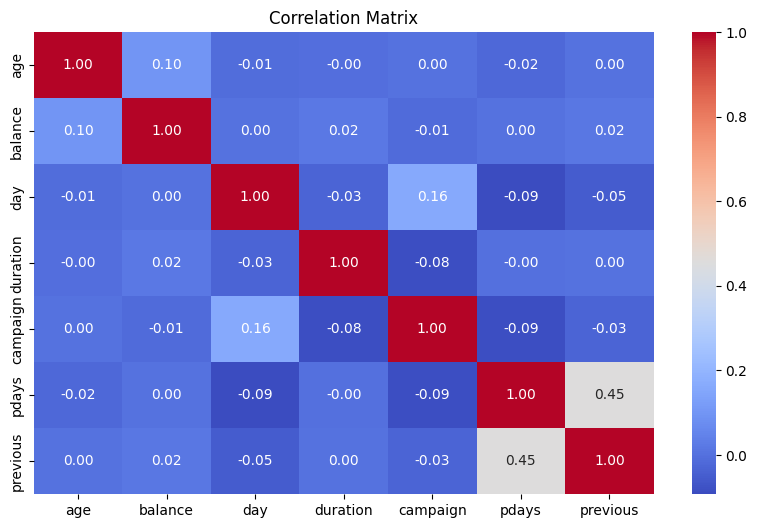

In [98]:
# Selecting  numeric columns
numeric_df = combined_df.select_dtypes(include=[np.number])
# Correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Observations:
We can see that most of the variables are not correlated to each other. This definitely stands out to us. Only previous and pdays are a little correlated to each other. We also see some negative correlations, for example, campaign and p days are negatively correlated, number of contacts and number of days passed after contacting a customer, and duration and campaign is also negatively correlated.

In [99]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = combined_df.select_dtypes(include=['object']).columns

#  encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])
    label_encoders[col] = le

In [100]:
combined_df = pd.get_dummies(combined_df, drop_first=True)

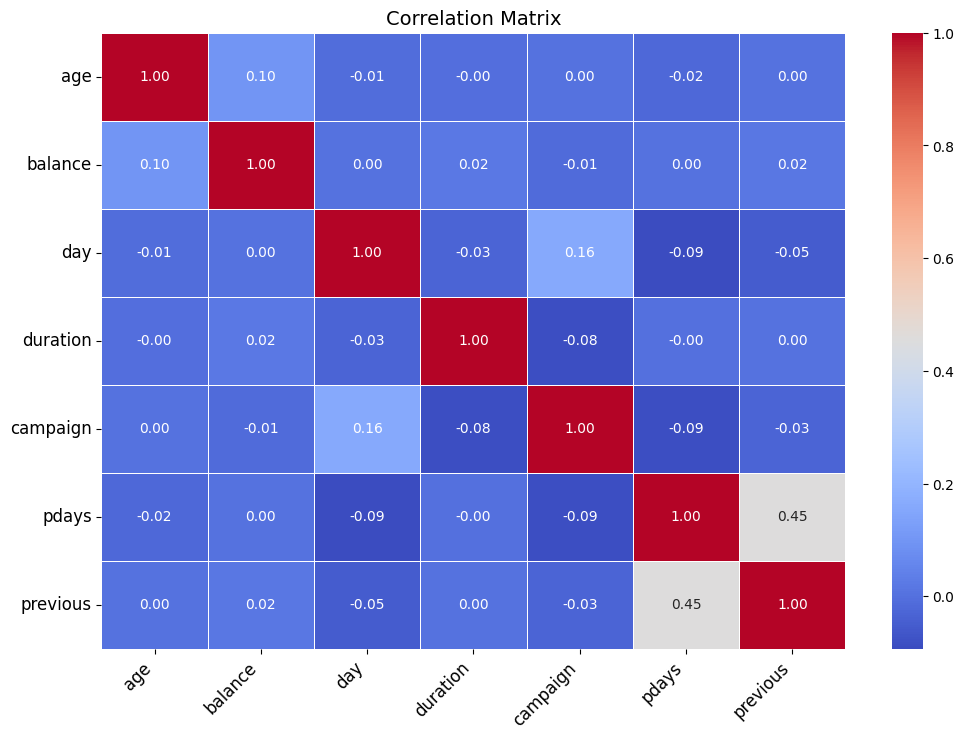

In [101]:
# Increase figure size
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})  # Smaller text

# Rotate x-axis and y-axis labels
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.title("Correlation Matrix", fontsize=14)
plt.show()

In [102]:
# looking at range of data in each variable
min_val = combined_df.min()
max_val = combined_df.max()
print(min_val)
print(max_val)
combined_df.describe()

age            18
job             0
marital         0
education       0
default         0
balance     -8019
housing         0
loan            0
contact         0
day             1
month           0
duration        0
campaign        1
pdays          -1
previous        0
poutcome        0
y               0
dtype: int64
age              95
job              11
marital           2
education         3
default           1
balance      102127
housing           1
loan              1
contact           2
day              31
month            11
duration       4918
campaign         63
pdays           871
previous        275
poutcome          3
y                 1
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [103]:
# Identify numerical and categorical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [104]:
# unique values in Categorical variables
for col in categorical_features:
    print(f"\nUnique values in {col}:")
    print(combined_df[col].value_counts())


Unique values in job:
job
1     9732
4     9458
9     7597
0     5171
7     4154
5     2264
6     1579
2     1487
10    1303
3     1240
8      938
11     288
Name: count, dtype: int64

Unique values in marital:
marital
1    27214
2    12790
0     5207
Name: count, dtype: int64

Unique values in education:
education
1    23202
2    13301
0     6851
3     1857
Name: count, dtype: int64

Unique values in default:
default
0    44396
1      815
Name: count, dtype: int64

Unique values in housing:
housing
1    25130
0    20081
Name: count, dtype: int64

Unique values in loan:
loan
0    37967
1     7244
Name: count, dtype: int64

Unique values in contact:
contact
0    29285
2    13020
1     2906
Name: count, dtype: int64

Unique values in month:
month
8     13766
5      6895
1      6247
6      5341
9      3970
0      2932
3      2649
4      1403
10      738
11      579
7       477
2       214
Name: count, dtype: int64

Unique values in poutcome:
poutcome
3    36959
0     4901
1     1840
2   

In [105]:
combined_df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [106]:
original_data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [107]:
# create a mapping for each categorical variable :'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'
combined_df['job'].unique()
job_map= {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}



In [108]:
# for marital
combined_df['marital'].unique()
marital_map = {'single': 0, 'married': 1, 'divorced': 2}

In [109]:
# for education: Basic_4_year, Basic_6_year, Basic_9_year, High-School, Illiterate, Professional_course, University_Degree, Unknown)
original_data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [110]:
education_mapping = {
    0: 'unknown',# combines illiterate, unknowN
    1: 'primary',  # combines basic.4y, basic.6y, and basic.9y
    2: 'secondary', # combines high school basic 9 yeaR
    3: 'tertiary' # PROFESSIONAL COURSE UNIVERSITY DEGREE
}

In [111]:
# for default
combined_df.groupby('default')['balance'].mean()
combined_df['default'].value_counts()
combined_df['default'].unique()
default_map = {'No': 0, 'Yes': 1,}


In [112]:
# for housing
combined_df['housing'].unique()
housing_map = {'No': 0, 'Yes': 1,}

In [113]:
# for loan
combined_df['loan'].unique()
combined_df.groupby('loan')['balance'].mean()
combined_df['loan'].value_counts()
loan_map = {'No': 0, 'Yes': 1,}



In [114]:
# for month
combined_df['month'].unique()
month_map = {'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may':8, 'nov': 9, 'oct': 10, 'sep': 11}


In [115]:
# for poutcome
original_data['poutcome'].unique()
poutcome_map = {'unknown': 0, 'failure': 1, 'success': 2, 'other': 3}

In [116]:
# for simple observation

original_data.to_excel('original_data.xlsx', index=False)
combined_df.to_excel('combined_df.xlsx', index=False)

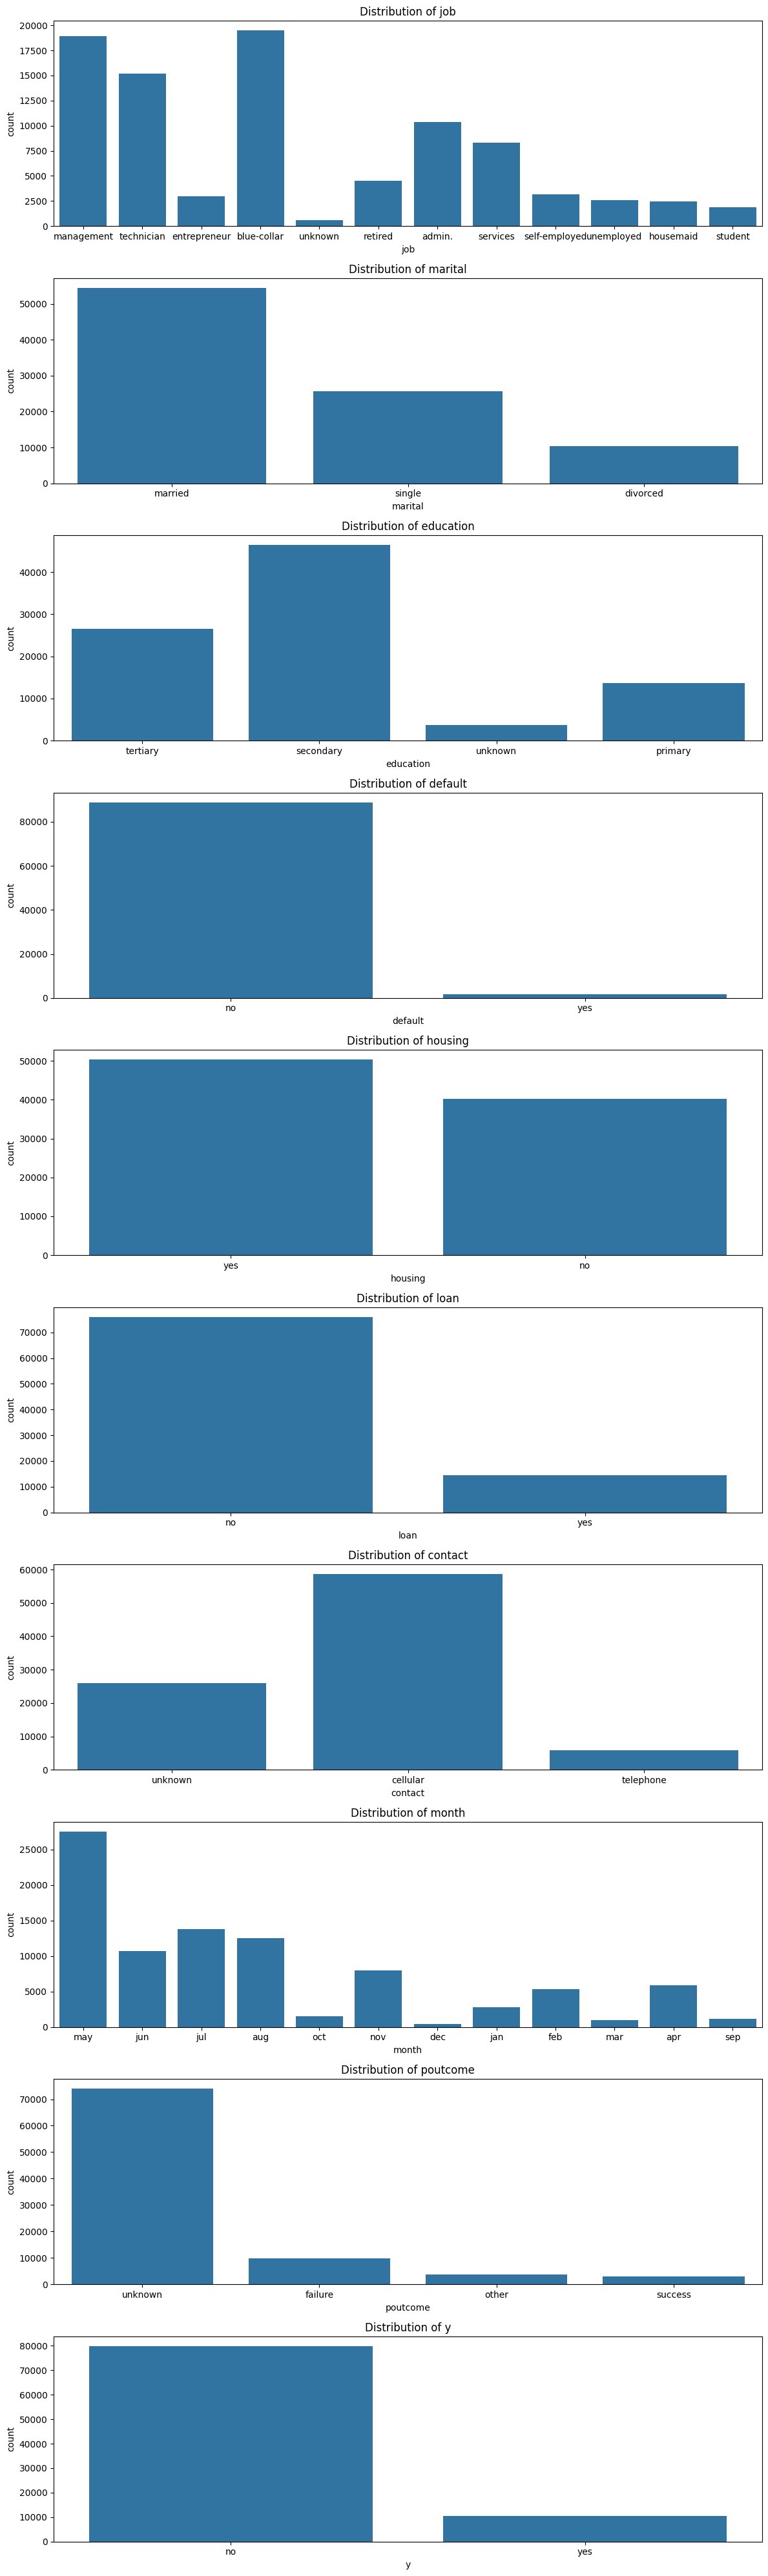

In [117]:

# distribution of categorical variables using original data so that we can view the distribution without encoding, it makes it easier ti understand
plt.figure(figsize=(12, len(categorical_columns) * 4))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(data=original_data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Observations: 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'
1. Job:


Exploratory Data Analysis (EDA) (~0.5 page)
Explore and document the characteristics of the dataset.
Data Source: Provide references and access information for the dataset(s).
Summary Statistics: Include key descriptive statistics (mean, median, standard deviation, etc.).
- Outliers and Patterns: Describe outliers, unusual patterns, and variable distributions.
- Preprocessing Needs: Document preprocessing needs identified during the analysis.
- Observations: Summarize observations to inform further analysis.

In [118]:
#
combined_df['education'].unique()
combined_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [119]:
print(combined_df.head(10))

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   
5   35    4        1          2        0      231        1     0        2   
6   28    4        2          2        0      447        1     1        2   
7   42    2        0          2        1        2        1     0        2   
8   58    5        1          0        0      121        1     0        2   
9   43    9        2          1        0      593        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       

In [120]:
# Encode categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])
    label_encoders[col] = le  # Store encoders for reference



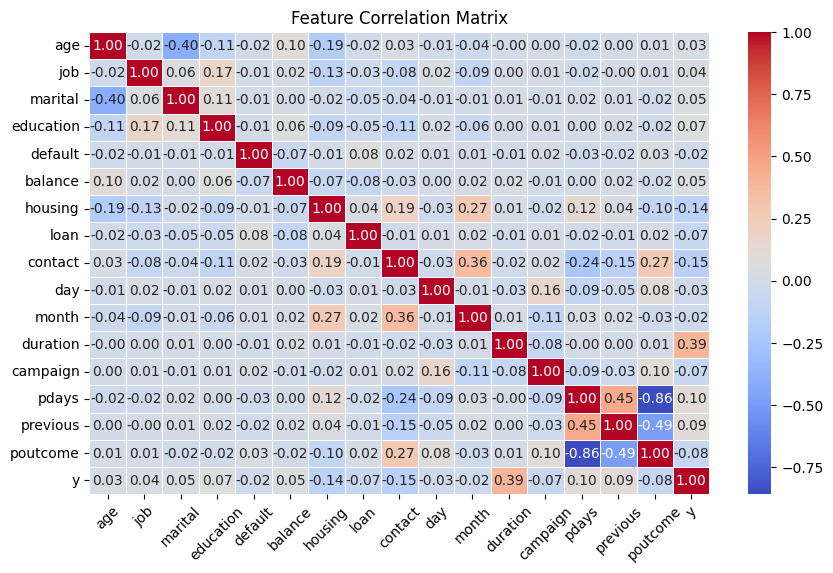

In [121]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)
plt.show()

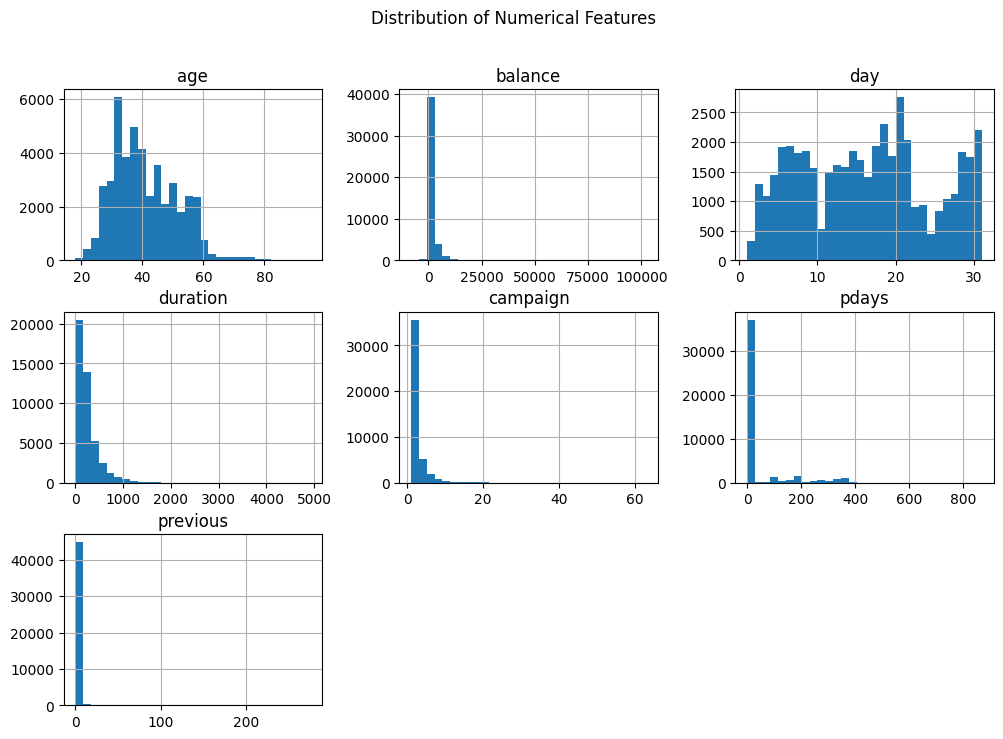

In [122]:

# Histograms for numerical features
combined_df[numerical_features].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

Clustering Method (DBSCAN) to assess numeric columns to look at density based clusters

In [123]:
# importing libraries for running dbscan
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from pandas import DataFrame

Consider from here


DBSCAN method: DBSCAN is a clustering algorigthm designed to identify outliers.
I am trying to identify outliers in my dataset to separate out outstanding individuals so that we can understand their type and create marketing strategies or look into policies to address why these individuals are outstanding out in our dataset.

DBSCAN method requires two important parameters:
1. Epsilon: the maximum distance to be considered for two points
2. Minimum points: the minimum number of points required to form a dense region <1>

I have considered these variables because for age and balance I saw some outliers in the data distribution and I want to explore categorical variables to describe what kind of individuals they may be.

In [124]:
# selection of required columns
df_separate = combined_df[['age', 'job', 'marital', 'education','balance', 'housing', 'loan']]

For, different kind of categorical variables we have different kind of levels or representation of data, for eg education is level wise, but loan is yes and no, so I am going to treat categorical variable differently.
So, according to my research on different kind of encoding for differentkind of categorical variable, I am going to apply, One hot encoding for Job, Marital. Ordinal for Education because that is level wise. We keep the age and balance variable the same.

I will preprocess my data, keep numerical features as it is, but use One hot enocder, ordinal encoder, binary features, I have checked the mapping for variables.

In [125]:
# # applying encoding on categorical variable using mapping in the codes above
# housing_map = {'No': 0, 'Yes': 1}
# loan_map = {'No': 0, 'Yes': 1}
# education_mapping = {
#     0: 'unknown',# combines illiterate, unknowN
#     1: 'primary',  # combines basic.4y, basic.6y, and basic.9y
#     2: 'secondary', # combines high school basic 9 yeaR
#     3: 'tertiary' # PROFESSIONAL COURSE UNIVERSITY DEGREE
# }

In [126]:
# check the mapping quickly
# combined_df['job'].unique()
# combined_df['marital'].unique()
# combined_df['education'].unique()
# combined_df['housing'].unique()
# combined_df['loan'].unique()

array([0, 1])

In [127]:
combined_df['marital'].unique()

array([1, 2, 0])

In [128]:
combined_df['education'].unique()

array([2, 1, 3, 0])

In [129]:
combined_df['housing'].unique()

array([1, 0])

In [130]:
combined_df['loan'].unique()

array([0, 1])

In [131]:
# # scaler: columns to scale
# scale_columns= ['age', 'job', 'marital', 'education','balance', 'housing', 'loan' ]

In [132]:
# numerical_features = ['age', 'balance']
# categorical_features = ['job', 'marital', 'education', 'housing', 'loan']

# # Apply preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])

In [133]:
# data_combo = preprocessor.fit_transform(combined_df)

In [134]:
# onehot_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
# all_features = numerical_features + onehot_features

In [135]:
# fit and transform the data for dbscan code
# data = preprocessor.fit_transform(combined_df)

# # Initialize dbcsna
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# clusters = dbscan.fit_predict(data)
# data_df = combined_df.copy()

# # data_df = pd.DataFrame(data)

# data_df['clusters'] = clusters

# print(data_df['clusters'].value_counts())
# print(data_df.head(5))

clusters
-1      2940
 22     2225
 98     1952
 13     1739
 0      1678
        ... 
 359       4
 213       4
 202       4
 366       4
 344       3
Name: count, Length: 380, dtype: int64
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  clusters  
0    5      8       261         1     -1         0         3  0         0  
1    5      8       151         1     -1         0         3  0         1  
2    5      8        76         1     -1         0         3  0         2  
3    5      8        92         1     -1  

In [136]:
# add clusters to df
# data_df['clusters'] = clusters

In [137]:
# # print to see
# print(data_df['clusters'].value_counts())
# print(data_df.head(5))


clusters
-1      2940
 22     2225
 98     1952
 13     1739
 0      1678
        ... 
 359       4
 213       4
 202       4
 366       4
 344       3
Name: count, Length: 380, dtype: int64
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  clusters  
0    5      8       261         1     -1         0         3  0         0  
1    5      8       151         1     -1         0         3  0         1  
2    5      8        76         1     -1         0         3  0         2  
3    5      8        92         1     -1  

In [138]:
# Separate features (X) and cluster labels (y)
# X = data_df.drop('clusters', axis=1)  # Features
# y = data_df['clusters']  # Labels

In [139]:
# #  Apply the SAME preprocessing
# X_scaled = preprocessor.transform(X)

In [140]:
# performing dimentionatlity reduction
# pca = PCA(n_components=4)
# X_pca = pca.fit_transform(X_scaled)


In [141]:
# # converting it into dataframe and cluster labels
# pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PCA3', 'PC4'])
# pca_df['Cluster'] = y

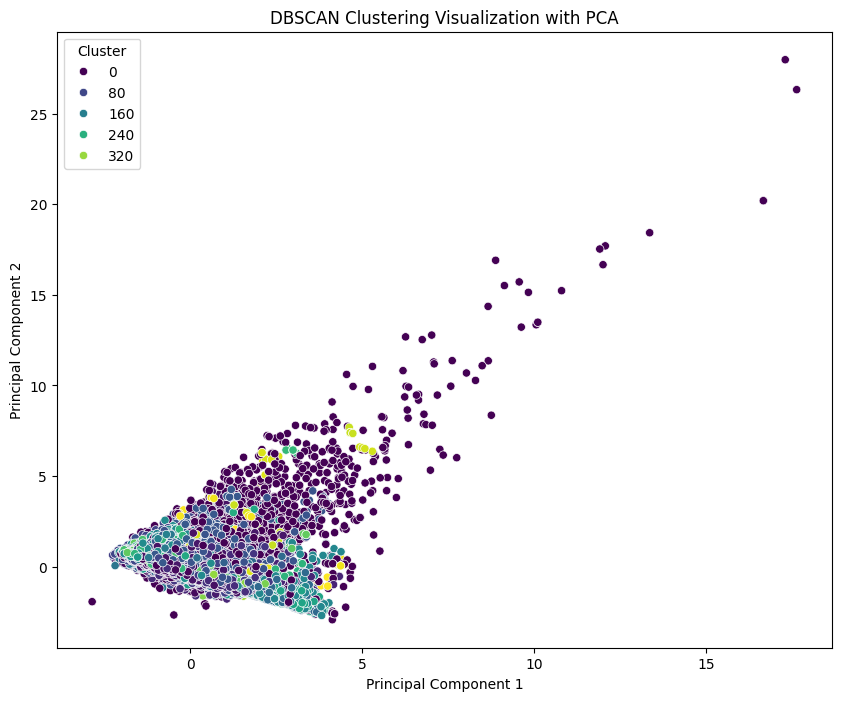

In [142]:
# # visualiese th eplot
# # Visualize the clusters using a scatter plot
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
# plt.title('DBSCAN Clustering Visualization with PCA')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

For now, I have commented out the AGE+ BALANCE+ Categorical variables model so that it doesn't interfere when I run the second model which has Age and Balance only.

# Just considering **Age** and **Balance**

I tried DBSCAN method for select few categorical variable with encoding, I tried to understand what kind of categorical variables I have in the dataset, checked their type for example, Education is Ordinal Categorical variable, Job, Marital turned out to be Nominal Categorical variable, while Housing, Loan where binary categorical variable. When I ran the results for DBSCAN method for age, balance and other categorical variable, the scatterplot for DBSCAN +PCA with categorical . I will explore the results for it later. For Now, Age and Balance were the only numeric data columns that I have considered initially.

In [164]:
numerical_features = ['age', 'balance']

# Apply preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

numerical_features = ['age', 'balance']

# Apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
    ],
    remainder= 'drop'
)

# Fit and transform the data
data_num_scaled= preprocessor.fit_transform(combined_df)


We have to fit the scaled data to the preprocessor.

In [165]:

all_features = numerical_features

In [166]:
# fit and transform the data for dbscan code
data_num_scaled = preprocessor.fit_transform(combined_df)

# Initialize dbcsna
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_num_scaled1)
data_df = combined_df.copy()

# data_df = pd.DataFrame(data)

data_df['clusters'] = clusters

print(data_df['clusters'].value_counts())
print(data_df.head(5))

clusters
 0    45137
-1       55
 2        7
 3        7
 1        5
Name: count, dtype: int64
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  clusters  
0    5      8       261         1     -1         0         3  0         0  
1    5      8       151         1     -1         0         3  0         0  
2    5      8        76         1     -1         0         3  0         0  
3    5      8        92         1     -1         0         3  0         0  
4    5      8       198         1     -1         0         3  

In [167]:
# add clusters to df
data_df['clusters'] = clusters

In [168]:
# print to see
print(data_df['clusters'].value_counts())
print(data_df.head(5))


clusters
 0    45137
-1       55
 2        7
 3        7
 1        5
Name: count, dtype: int64
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  clusters  
0    5      8       261         1     -1         0         3  0         0  
1    5      8       151         1     -1         0         3  0         0  
2    5      8        76         1     -1         0         3  0         0  
3    5      8        92         1     -1         0         3  0         0  
4    5      8       198         1     -1         0         3  

In [169]:
# now conducting pca and trying to visualize how the clusters are like

In [172]:
# 1. Separate features (X) and cluster labels (y)
X = data_df.drop('clusters', axis=1)  # Features
y = data_df['clusters']  # Labels

In [174]:
# 2. Apply the SAME preprocessing
X_scaled = preprocessor.transform(X)

In [175]:
# performing dimentionatlity reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [176]:
# converting it into dataframe and cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = y

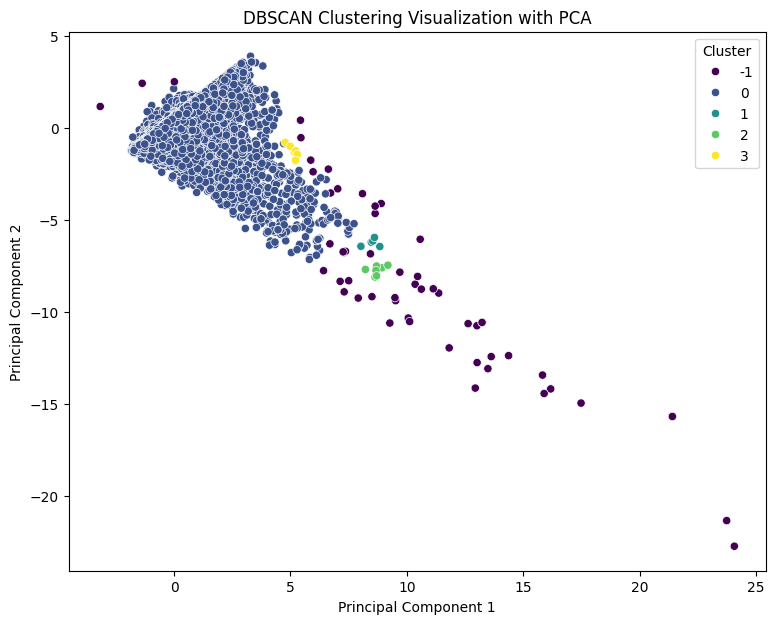

In [177]:
# visualiese th eplot
# 5. Visualize the clusters using a scatter plot
plt.figure(figsize=(9, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('DBSCAN Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [154]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.54889137 0.45110863]


In [160]:
pca1 = PCA(n_components=2)  # Make sure PCA is defined with n_components=2
X_pca = pca1.fit_transform(X_scaled)

loadings = pca.components_



In [156]:
# numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
# categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [178]:
loadings_df = pd.DataFrame(loadings,
                           columns = all_features, # Replace if necessary
                           index = ['PC1', 'PC2'])

print("\nPCA Loadings:\n", loadings_df)


PCA Loadings:
           age   balance
PC1  0.707107  0.707107
PC2  0.707107 -0.707107


In [180]:
outlier_count = (pca_df['Cluster'] == -1).sum()
print(f"Total number of outliers detected by DBSCAN: {outlier_count}")

Total number of outliers detected by DBSCAN: 55


Next step is to identify these individuals.

Gen AI Declaration: Google docs link, the same screenshots are included in the Project report as well.
https://docs.google.com/document/d/1ujyrYHPLhgPJTCD9qAz40q3WZBk8oTh8/edit
